In [1]:
# In this Note book we will explore the contents of the OTT platforms and much more

# Understanding what content is available in different countries
# Identifying similar content by matching text-based features
# Network analysis of Actors / Directors and find interesting insights
# Does Amazon Prime has more focus on TV Shows than movies in recent years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
warnings.filterwarnings('ignore')

In [2]:
netflix = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\OTT\netflix_titles.csv')
amazon = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\OTT\amazon_prime_titles.csv')
disney = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\OTT\disney_plus_titles.csv')

In [3]:
print('The no. of content {} has : {}'.format('Netflix',netflix.shape[0]))
print('The no. of content {} has : {}'.format('Amazon Prime',amazon.shape[0]))
print('The no. of content {} has : {}'.format('Disney Plus Hotstar',disney.shape[0]))

The no. of content Netflix has : 8807
The no. of content Amazon Prime has : 9668
The no. of content Disney Plus Hotstar has : 1368


In [4]:
# netflix.drop(['Year_added'],axis = 1 , inplace = True)

In [5]:
# let's convert the 'date_added' and 'release_year' from object to datetime64
def date_parsing(df):
    df['date_added'] = pd.to_datetime(df['date_added'])
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month
    df['date_added'] = df['date_added'].dt.date
    return df

In [6]:
# # don't do it it's the same thing
# netflix['Release_year'] = pd.to_datetime(netflix['release_year'], format = '%Y').dt.year
# netflix.drop(['Release_year'], axis = 1, inplace  = True)

In [7]:
# parsing date
print('NaN in date_added for amazon {} out of {} data'.format(amazon.date_added.isna().sum(),amazon.shape[0]))
print('NaN in date_added for netflix {} out of {} data'.format(netflix.date_added.isna().sum(),netflix.shape[0]))
print('NaN in date_added for disney {} out of {} data'.format(disney.date_added.isna().sum(),disney.shape[0]))

NaN in date_added for amazon 9513 out of 9668 data
NaN in date_added for netflix 10 out of 8807 data
NaN in date_added for disney 3 out of 1368 data


In [8]:
# as we can see there are a lot missing values in amazon df 
# so we will not parse the date_added col of the amazon df
# date parsing for netflix
netflix = date_parsing(netflix)
# date parsing for disney
disney = date_parsing(disney)

In [9]:
amazon.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
amazon[amazon['director'] == 'Mark Knight'][['title','duration','listed_in','rating','type','release_year']].sort_values(['release_year'])

title duration  \
3474                             30 Minutes of Serenity   30 min   
3475                           30 Minutes of Relaxation   30 min   
3119             Beautiful Vistas from Around the World   30 min   
3471                      30 Minutes of Water in Nature   30 min   
3459                        45 Minutes In South America   45 min   
...                                                 ...      ...   
3451                      7 Minute Yoga Nidra for Focus    7 min   
3446          8 Minute Meditation to Forget and Forgive    8 min   
1999                          Journey Through The Stars   60 min   
3557             15 Minute Mountain Sleep Visualization   15 min   
7615  Night Sky With Nature Sounds with 432hz nature...  540 min   

                          listed_in rating   type  release_year  
3474               Special Interest    ALL  Movie          2012  
3475               Special Interest    ALL  Movie          2012  
3119               Special Interest    ALL  Movie          2012  
3471               Special Interest    ALL  Movie          2012  
3459               Special Interest    ALL  Movie          2012  
...                             ...    ...    ...           ...  
3451         Faith and Spirituality    ALL  Movie          2020  
3446               Special Interest    ALL  Movie          2020  
1999  Documentary, Special Interest    ALL  Movie          2020  
3557         Faith and Spirituality    ALL  Movie          2020  
7615               Special Interest    ALL  Movie          2020  

[113 rows x 6 columns]

In [11]:
amazon[amazon['director'] == 'Cannis Holder'][['title','duration','listed_in','rating','type','release_year']].sort_values(['release_year'])

title duration  \
1455         Nursery Rhymes Volume 3 by Little Baby Bum   46 min   
1454         Nursery Rhymes Volume 4 by Little Baby Bum   53 min   
1453         Nursery Rhymes Volume 6 by Little Baby Bum   49 min   
4238  Nursery Rhymes Volume 11 by Little Baby Bum - ...   49 min   
1457  Nursery Rhymes Volume 10 by Little Baby Bum - ...   49 min   
...                                                 ...      ...   
5204  Little Baby Bum - Wash Your Hands Song & More ...   30 min   
1848  Little Baby Bum - Humpty Dumpty and Lots More ...   31 min   
5572  Little Baby Bum - Five Little Ducks and More N...   35 min   
6280              Getting Ready for School - Kids Songs   36 min   
6626     Summertime Songs for Kids with Little Baby Bum   34 min   

            listed_in    rating   type  release_year  
1455  Animation, Kids       ALL  Movie          2015  
1454             Kids       ALL  Movie          2015  
1453             Kids       ALL  Movie          2016  
4238             Kids       ALL  Movie          2018  
1457             Kids       ALL  Movie          2018  
...               ...       ...    ...           ...  
5204             Kids  ALL_AGES  Movie          2020  
1848             Kids       ALL  Movie          2020  
5572             Kids       ALL  Movie          2020  
6280             Kids       ALL  Movie          2021  
6626             Kids       ALL  Movie          2021  

[61 rows x 6 columns]

In [12]:
# what is produced more movies or tv shows over the years
def types_year(df):
    """ df = dataframe
        _type1 = year_added
        _type2 = release_year
        """
    try:
        _type1 = pd.DataFrame(df.groupby('year_added')['type'].value_counts())
        _type1.rename(columns = {'type':'Counts'}, inplace = True)
        _type1.reset_index(inplace = True)
        _type1.set_index('year_added', inplace  = True)
        _type_1 = _type1[_type1.type == 'Movie']

        _type_1.drop(['type'], axis = 1 , inplace=  True)
        _type_1.rename(columns = {'Counts':'Movie'}, inplace = True)


        _type_2 = _type1[_type1.type == 'TV Show']
        _type_2.drop(['type'], axis = 1 , inplace=  True)
        _type_2.rename(columns = {'Counts':'TV Show'}, inplace = True)
        _type101 = _type_2.merge(_type_1,how = 'right',on = 'year_added')
        _type101.fillna(0,inplace = True)
    except KeyError:
        _type101 = 'Nan'
    try:
        _type2 = pd.DataFrame(df.groupby('release_year')['type'].value_counts())
        _type2.rename(columns = {'type':'Counts'}, inplace = True)
        _type2.reset_index(inplace = True)
        
        _type2.set_index('release_year', inplace  = True)
        _type_21 = _type2[_type2.type == 'Movie']

        _type_21.drop(['type'], axis = 1 , inplace=  True)
        _type_21.rename(columns = {'Counts':'Movie'}, inplace = True)


        _type_22 = _type2[_type2.type == 'TV Show']
        _type_22.drop(['type'], axis = 1 , inplace=  True)
        _type_22.rename(columns = {'Counts':'TV Show'}, inplace = True)
        _type201 = _type_22.merge(_type_21,how = 'right',on = 'release_year')
        _type201.fillna(0,inplace = True)
        
    except KeyError:
        _type201 = 'Nan'
    return _type101,_type201

In [13]:
net_type_add,net_type_rel = types_year(netflix)
ama_type_add,ama_type_rel = types_year(amazon)
dis_type_add,dis_type_rel = types_year(disney)

In [14]:
def production_plot(data,add_or_rel,platform):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (15,6))
    sns.lineplot(data=data, palette="tab10", linewidth=2.5)
    plt.title('Movies and TV Shows production per Year'+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('YEARS'+ add_or_rel,fontsize = 16)
    plt.ylabel('Movies and Shows Counts',fontsize = 16)
    plt.show()

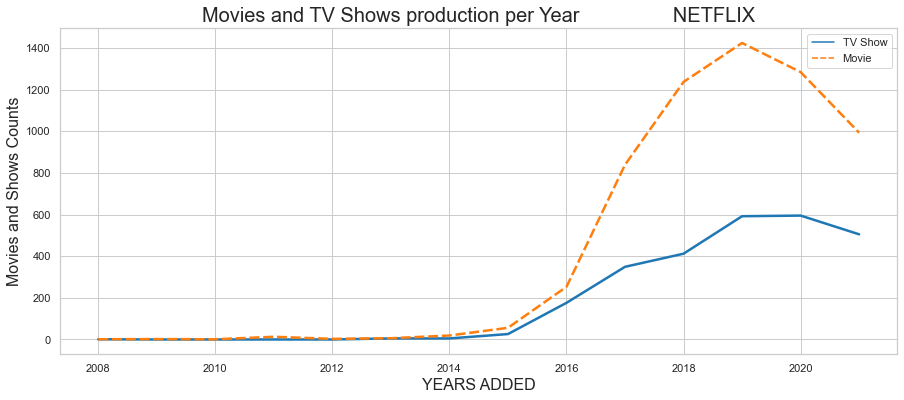

In [15]:
production_plot(net_type_add,' ADDED','                 NETFLIX')

In [16]:
# NETFLIX
# The amount of content produced per year has been increasing each year since 2015
# The reason for the drop during 2019 must be due to the pandemic

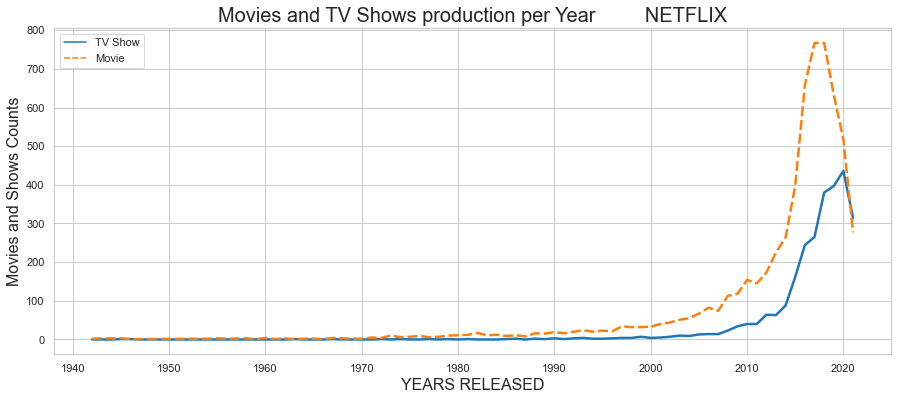

In [17]:
production_plot(net_type_rel,' RELEASED','         NETFLIX')

In [18]:
# NETFLIX
# we can also notice that the amout of TV shows production per year has also increased
# for last 10 years or so

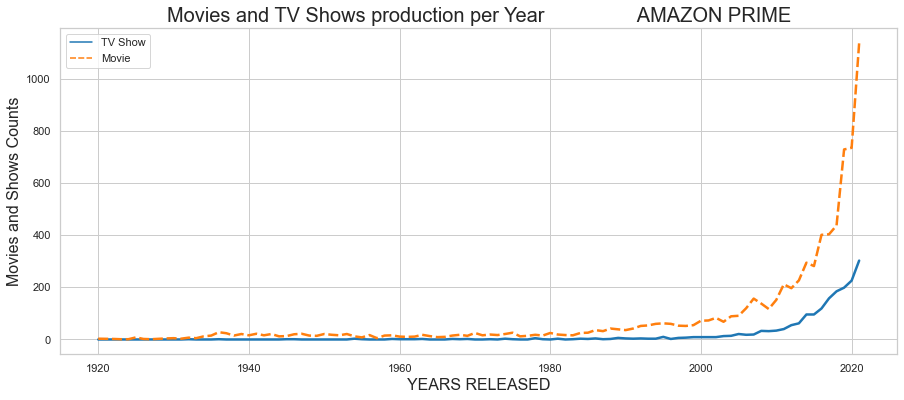

In [19]:
production_plot(ama_type_rel,' RELEASED','                 AMAZON PRIME')

In [20]:
# AMAZON PRIME
# The amount of content amamzon produce is still lower compaire to netflix
# but  we can still see the same trend in here as well

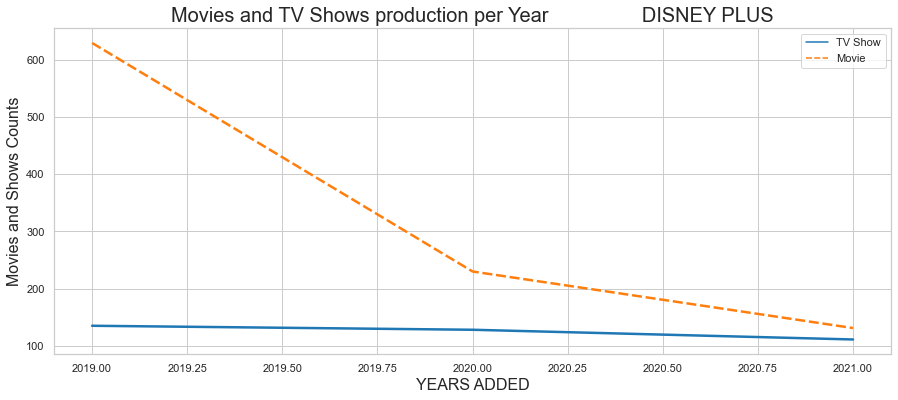

In [21]:
production_plot(dis_type_add,' ADDED','                 DISNEY PLUS')

In [22]:
# DISNEY PLUS
# well disney plus is new to ott so there isn't much data here to compare it to ohers
# but we can see that disney produce more movies compare to tv shows

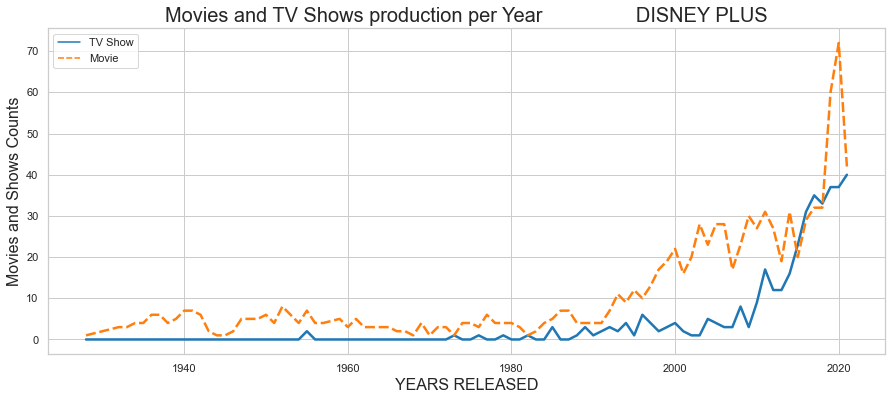

In [23]:
production_plot(dis_type_rel,' RELEASED','                 DISNEY PLUS')

In [24]:
# DISNEY PLUS
# But here we can see the growth in the tv shows production 
# even some times more than movies (in year 2018-19)

In [25]:
def Geners_added(data):
    df = data[['type','director','country','date_added','release_year','rating','duration','year_added','month_added','listed_in']]
    geners = ['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports']

    for gen in geners:
        gen_list = []
        for i in df['listed_in']:
            gen_val = 1 if gen in i.lower() else 0
            gen_list.append(gen_val)
        df[gen] =  gen_list
    return df    

In [26]:
n_flix_gen = Geners_added(netflix)
# ama_gen = Geners_added(amazon) # don't have date_added remember 
dis_gen = Geners_added(disney)

nflix_gen_data1 = n_flix_gen.groupby('year_added')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()
nflix_gen_data2 = n_flix_gen.groupby('release_year')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()
dis_gen_data2 = dis_gen.groupby('release_year')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()
dis_gen_data1 = dis_gen.groupby('year_added')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()

nflix_gen_data3 = n_flix_gen.groupby('month_added')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()
dis_gen_data3 = dis_gen.groupby('month_added')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()

In [27]:
def genre_plot(data,platform,add_or_rel):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (20,10))
    sns.lineplot(data=data, palette="tab10", linewidth= 5)
    plt.title('GENRES'+'        '+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('YEARS'+" "+add_or_rel,fontsize = 16)
    plt.ylabel('Genres Counts',fontsize = 16)
    plt.legend(loc="upper left", frameon=True, fontsize=20,markerscale = 80)
    plt.show()

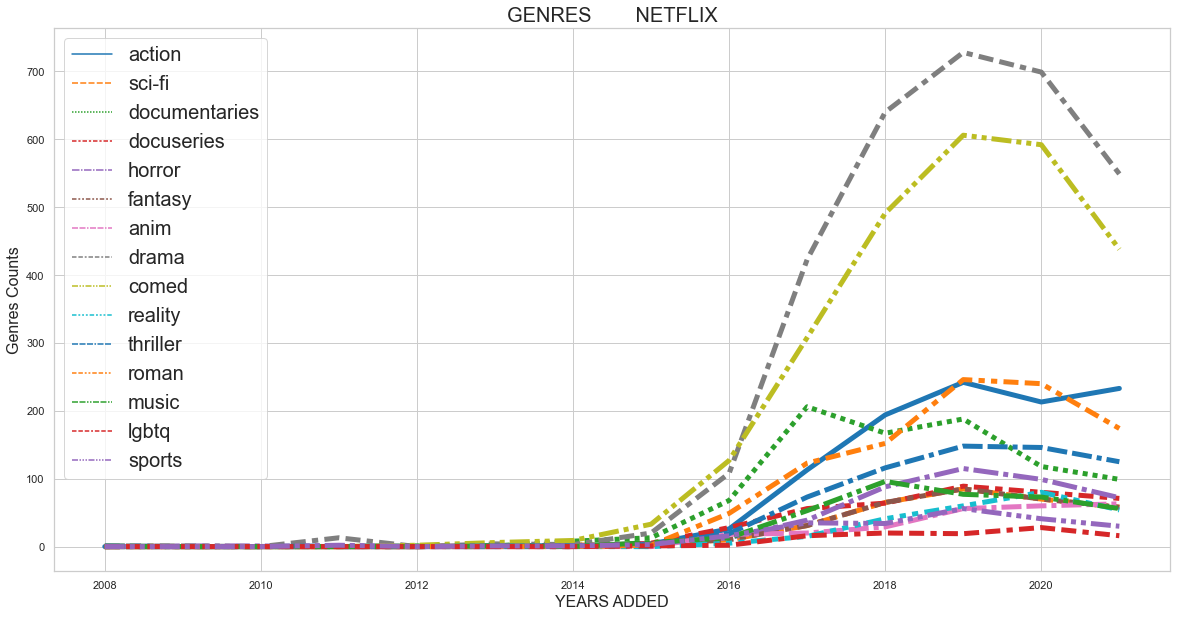

In [28]:
genre_plot(nflix_gen_data1,'NETFLIX','ADDED')

In [29]:
# Ok more comedy and more drama 
# action is also increasing from 2016 so is the romance
# The production of documentaries was all time high in the year 2016 
# but from that it's demand is decreasing

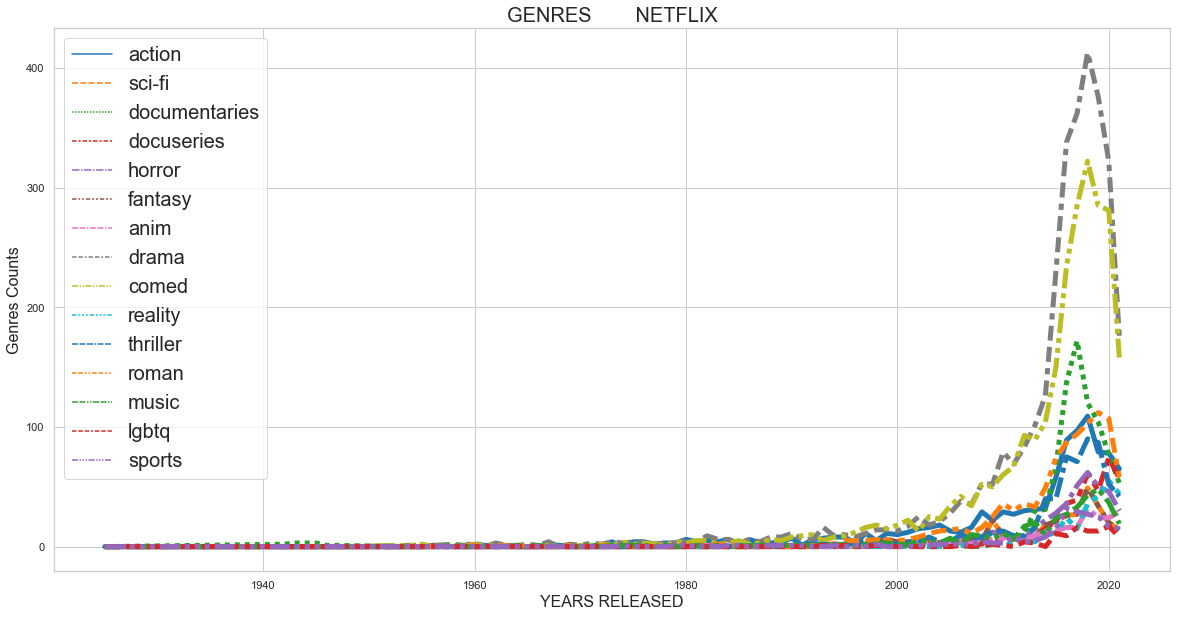

In [30]:
genre_plot(nflix_gen_data2,'NETFLIX','RELEASED')

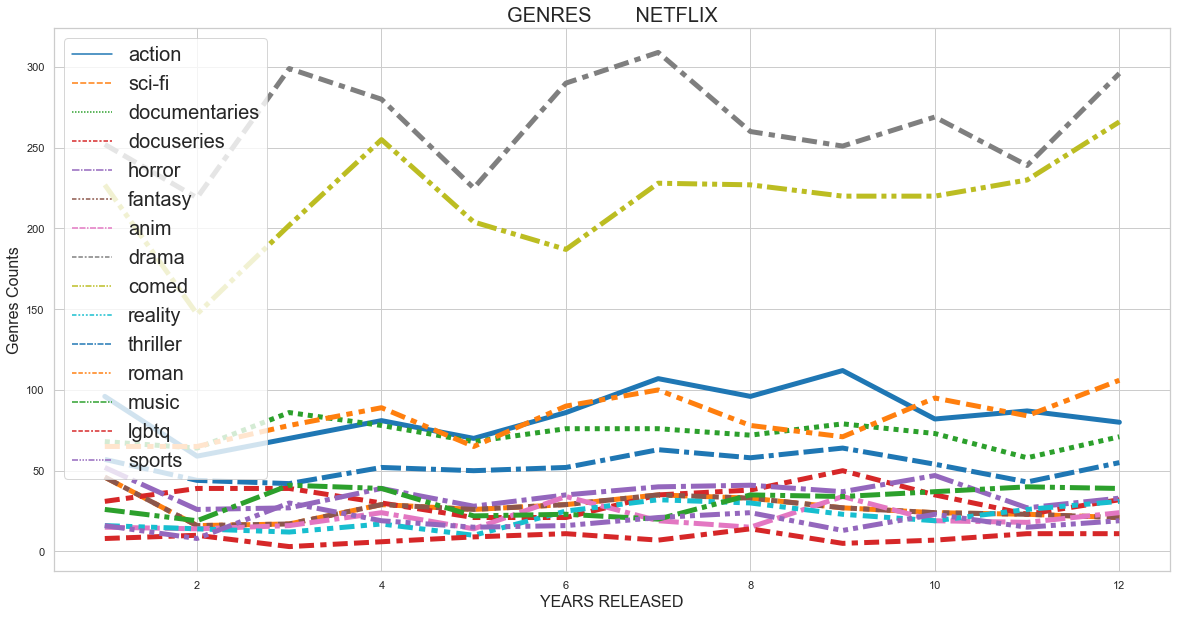

In [31]:
genre_plot(nflix_gen_data3,'NETFLIX','RELEASED')

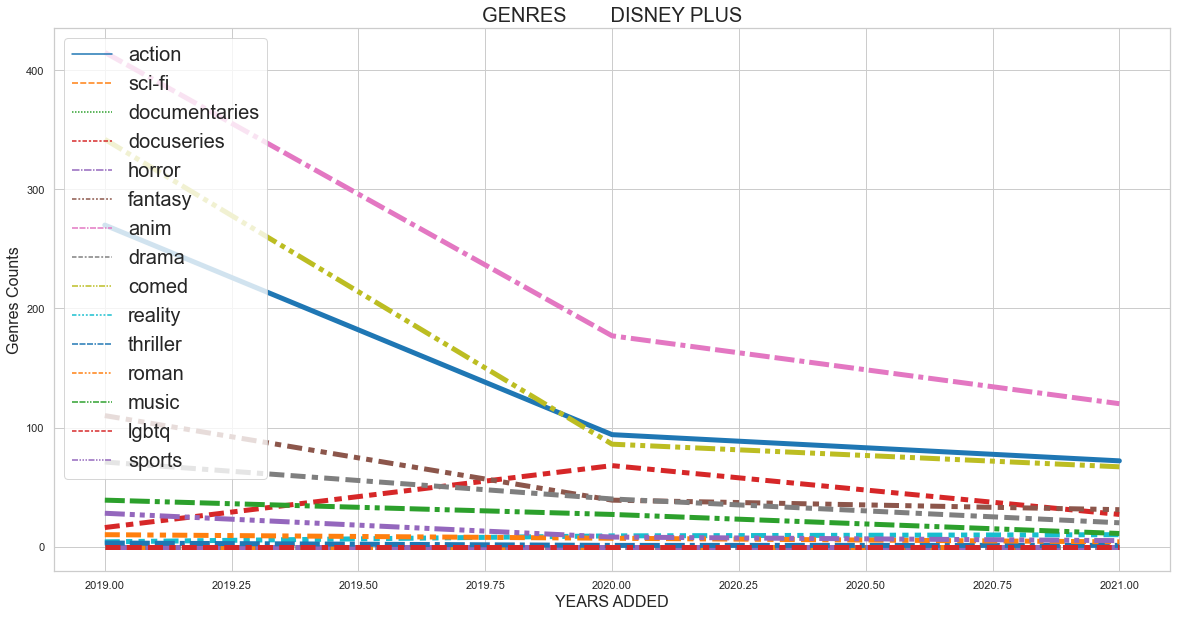

In [32]:
genre_plot(dis_gen_data1,'DISNEY PLUS','ADDED')

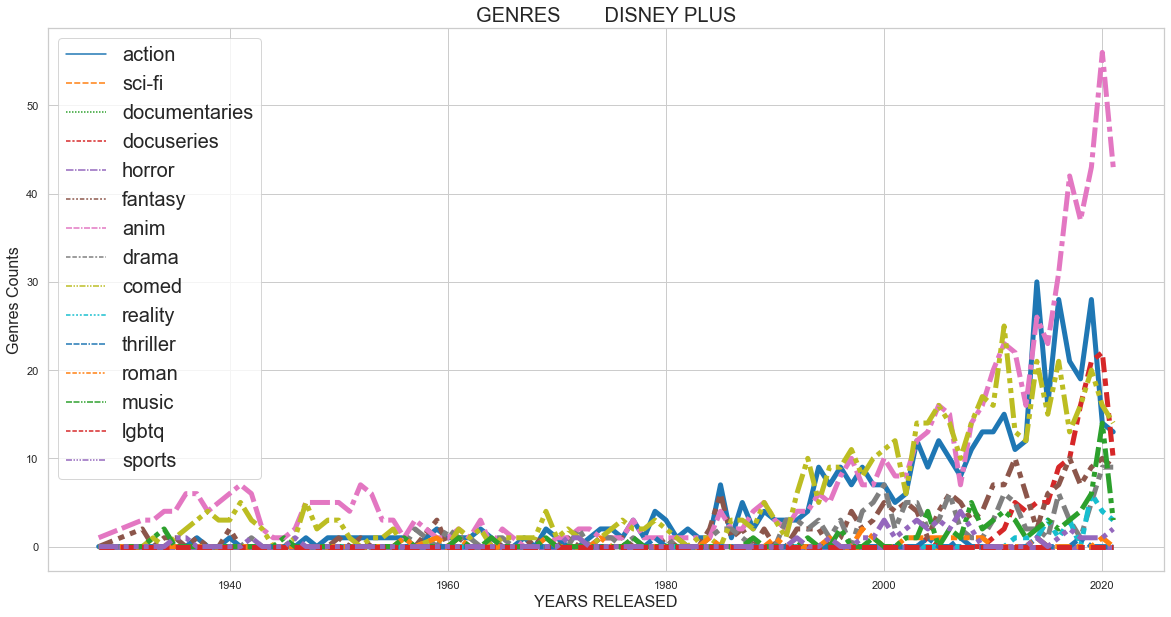

In [33]:
genre_plot(dis_gen_data2,'DISNEY PLUS','RELEASED')

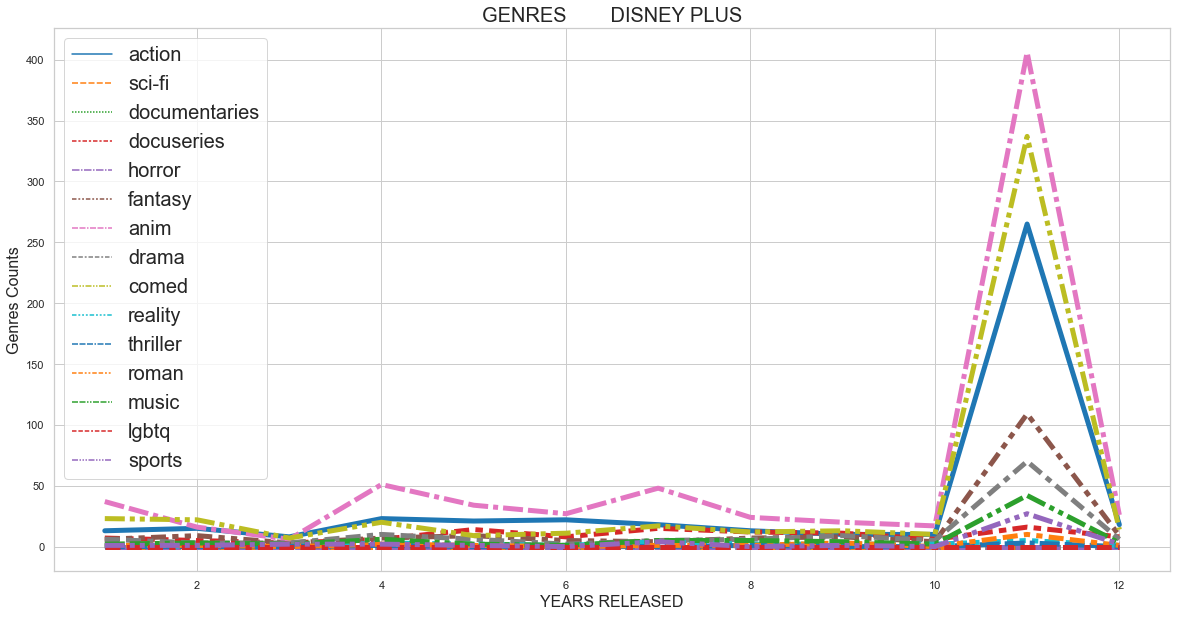

In [34]:
genre_plot(dis_gen_data3,'DISNEY PLUS','RELEASED')

In [35]:
nflix_gen_rat = n_flix_gen.groupby('rating')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()
dis_gen_rat = dis_gen.groupby('rating')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()

In [36]:
def genre_rating_plot(data,platform):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (20,10))
    sns.lineplot(data=data, palette="tab10", linewidth= 5)
    plt.title('GENRES RATINGS'+'        '+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('RATINGS',fontsize = 16)
    plt.ylabel('Counts',fontsize = 16)
    plt.legend(loc="upper left", frameon=True, fontsize=20,markerscale = 80)
    plt.show()

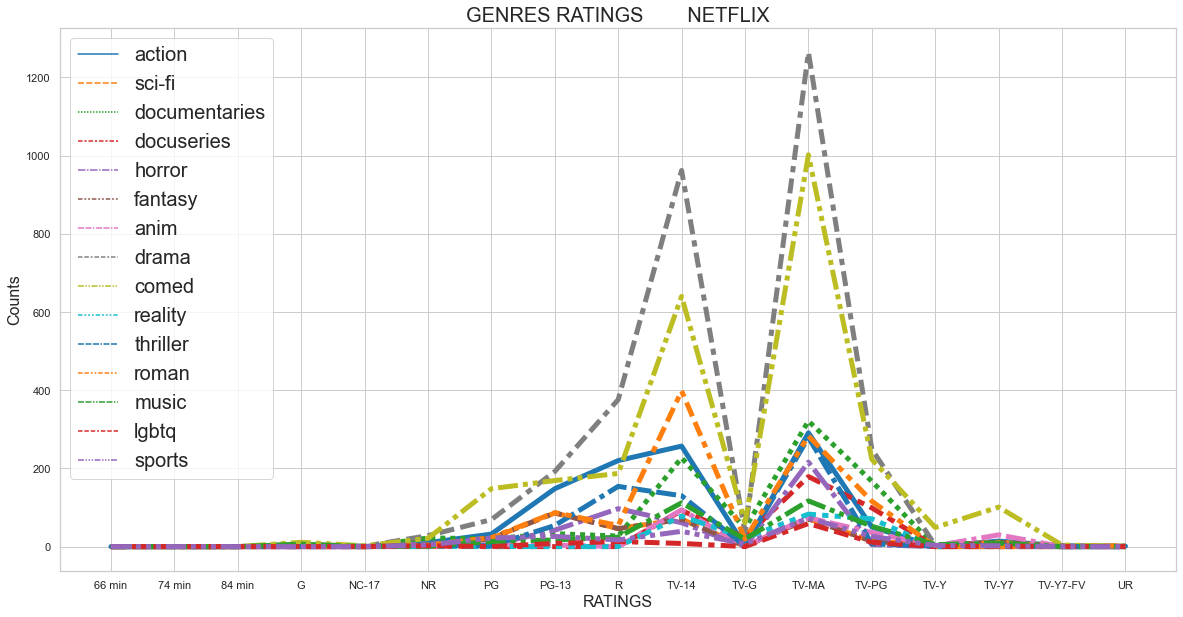

In [37]:
genre_rating_plot(nflix_gen_rat,'NETFLIX')

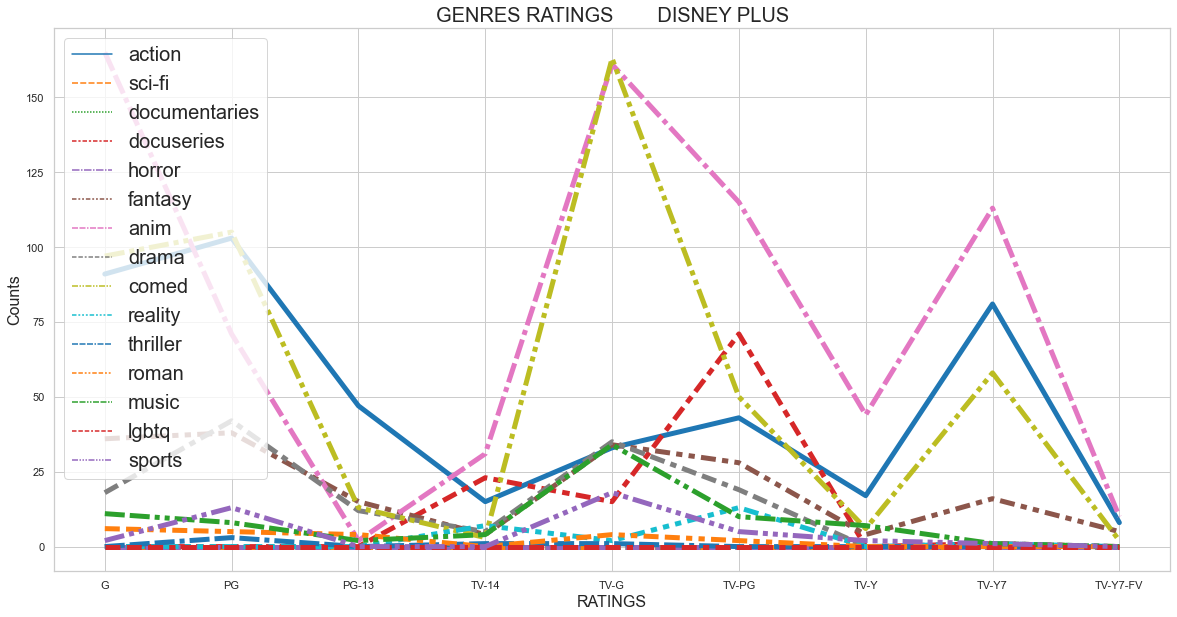

In [38]:
genre_rating_plot(dis_gen_rat,'DISNEY PLUS')

In [39]:
def Geners_added_ama(data):
    df = data[['type','director','country','release_year','rating','duration','listed_in']]
    geners = ['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports']

    for gen in geners:
        gen_list = []
        for i in df['listed_in']:
            gen_val = 1 if gen in i.lower() else 0
            gen_list.append(gen_val)
        df[gen] =  gen_list
    return df    

In [40]:
ama_gen = Geners_added_ama(amazon)
ama_gen_1 = ama_gen.groupby('release_year')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()

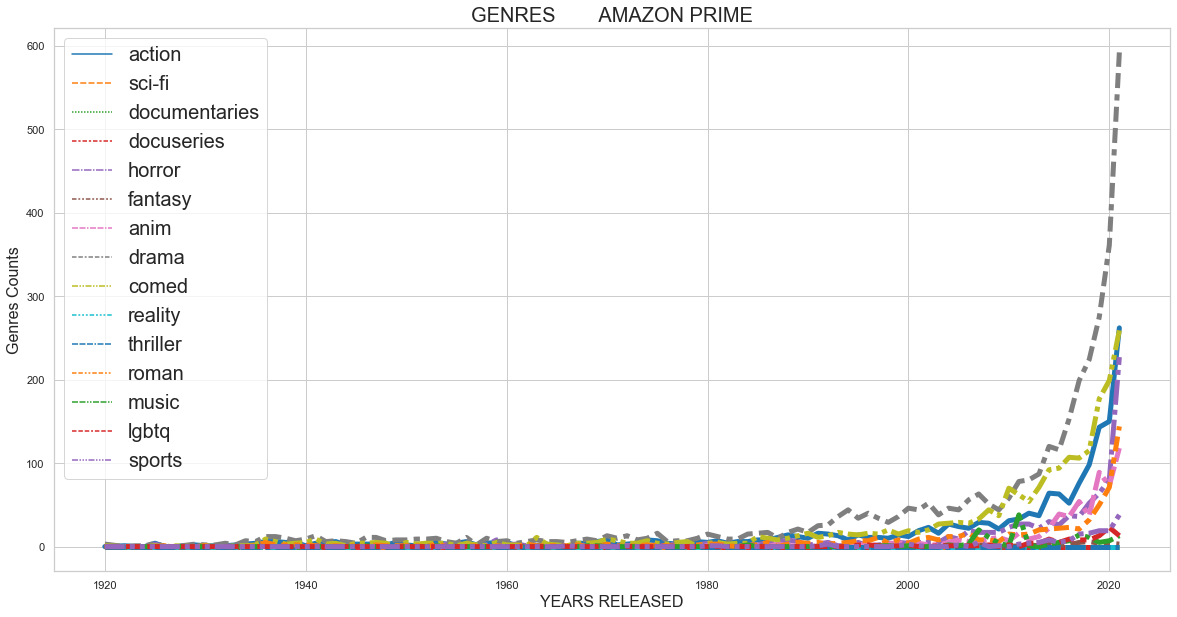

In [41]:
genre_plot(ama_gen_1,'AMAZON PRIME','RELEASED')

In [42]:
# AMAZON PRIME
# Same as netflix more drama and more comedy followed by action and horror 

In [43]:
def rating_year(data):
    df = data[['type','director','country','date_added','release_year','rating','duration','year_added','month_added','listed_in']]
    raters = ['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14']

    for ret in raters:
        ret_list = []
        for i in df['rating']:
            ret_val = 1 if ret in str(i) else 0
            ret_list.append(ret_val)
        df[ret] =  ret_list
    return df    

In [44]:
net_rat = rating_year(netflix)
dis_rat = rating_year(disney)

net_rat_1 = net_rat.groupby('year_added')['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14'].sum()
net_rat_2 = net_rat.groupby('release_year')['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14'].sum()
net_rat_3 = net_rat.groupby('month_added')['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14'].sum()

dis_rat_3 = dis_rat.groupby('month_added')['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14'].sum()
dis_rat_2 = dis_rat.groupby('release_year')['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14'].sum()
dis_rat_1 = dis_rat.groupby('year_added')['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14'].sum()

In [45]:
def rating_plot(data,platform,add_or_rel):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (20,10))
    sns.lineplot(data=data, palette="tab10", linewidth= 5)
    plt.title('GENRES RATINGS'+'        '+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('Year'+" "+add_or_rel,fontsize = 16)
    plt.ylabel('Rating Counts',fontsize = 16)
    plt.legend(loc="upper left", frameon=True, fontsize=25,markerscale = 80)
    plt.show()

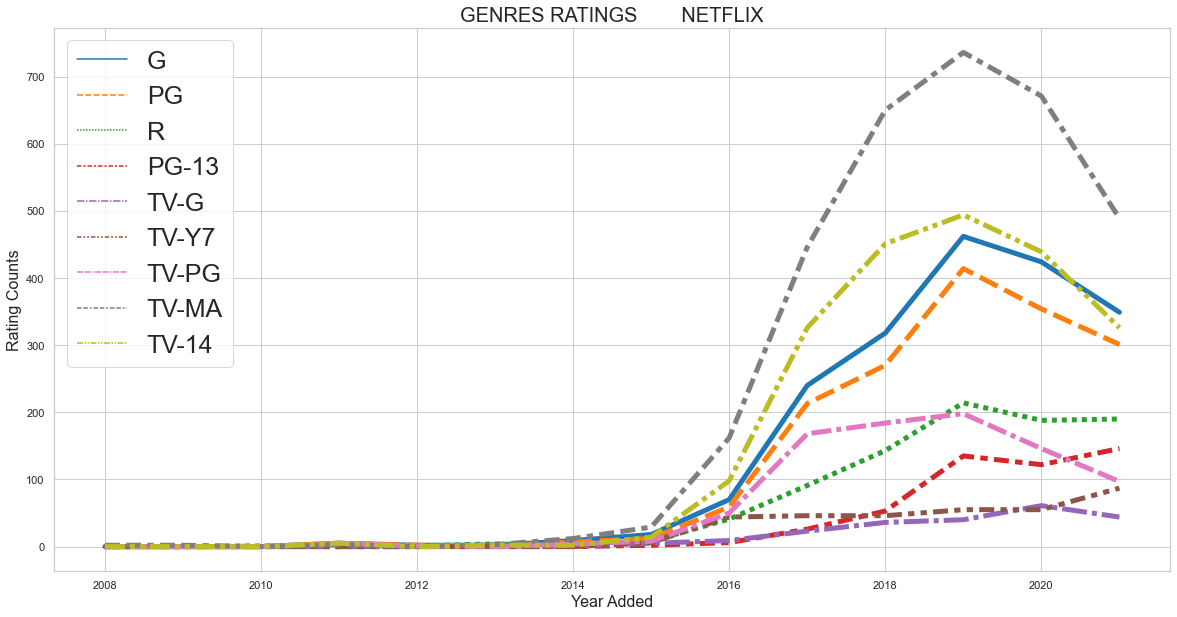

In [46]:
rating_plot(net_rat_1,'NETFLIX','Added')

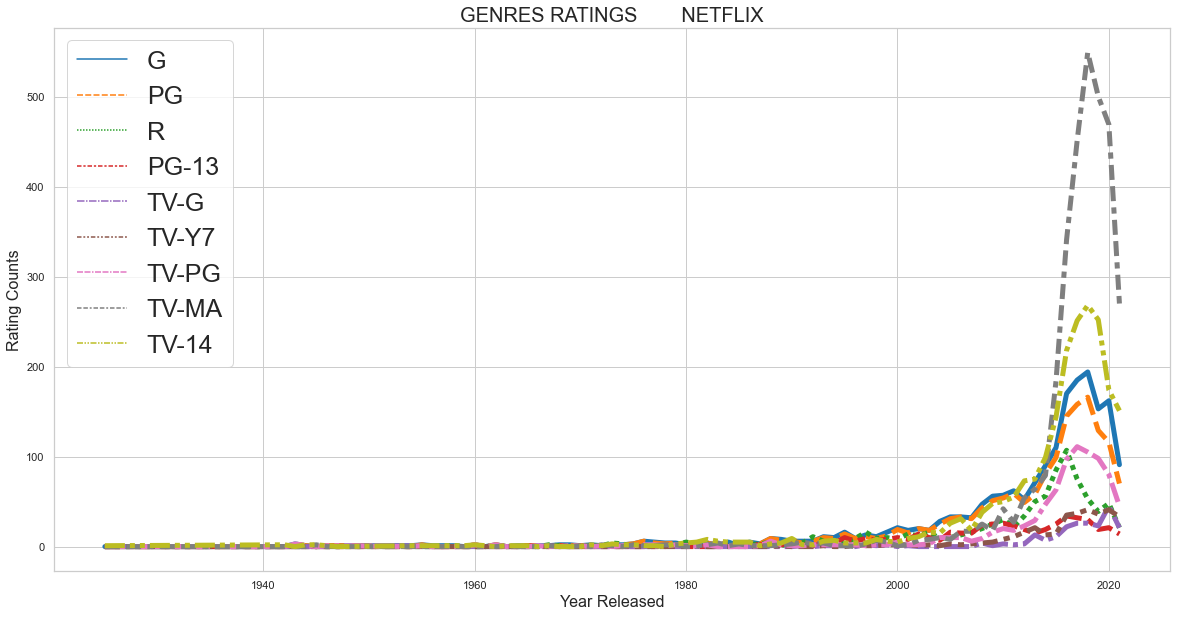

In [47]:
rating_plot(net_rat_2,'NETFLIX','Released')

In [48]:
# NETFLIX
# From both of the above plots it is evident that most of the netflix produced and added
# contents are for matuare audiences
# Then comes the TV-14 and G ratings

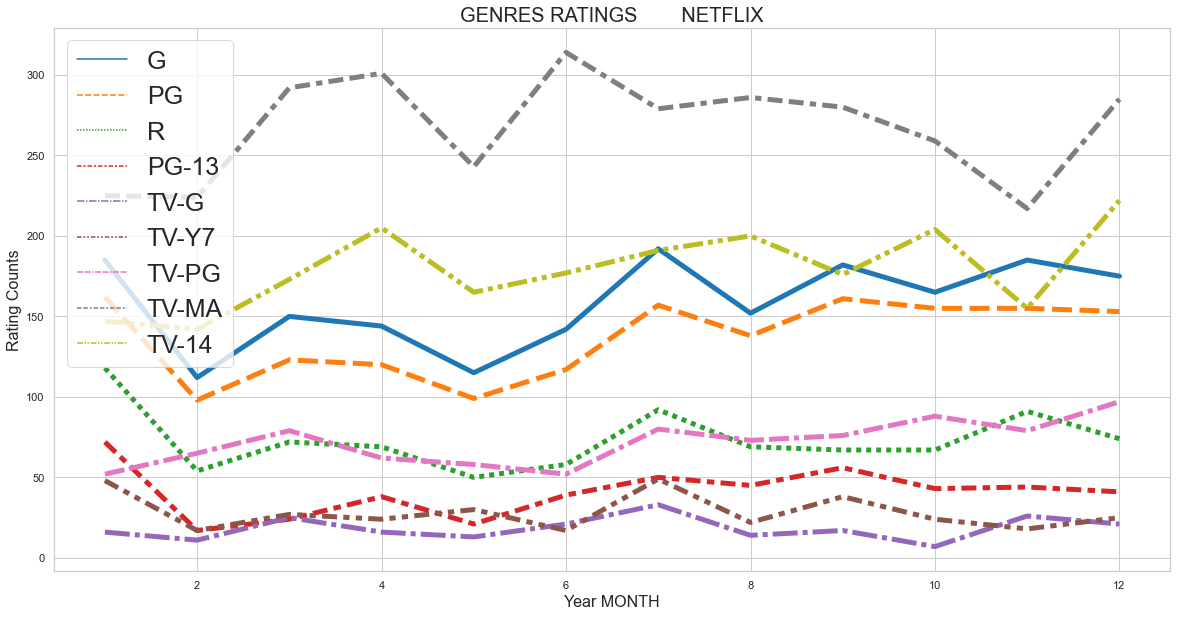

In [49]:
rating_plot(net_rat_3,'NETFLIX','MONTH')

In [50]:
#NETFLIX
# Nothing special here netflix doesn't care that much about months

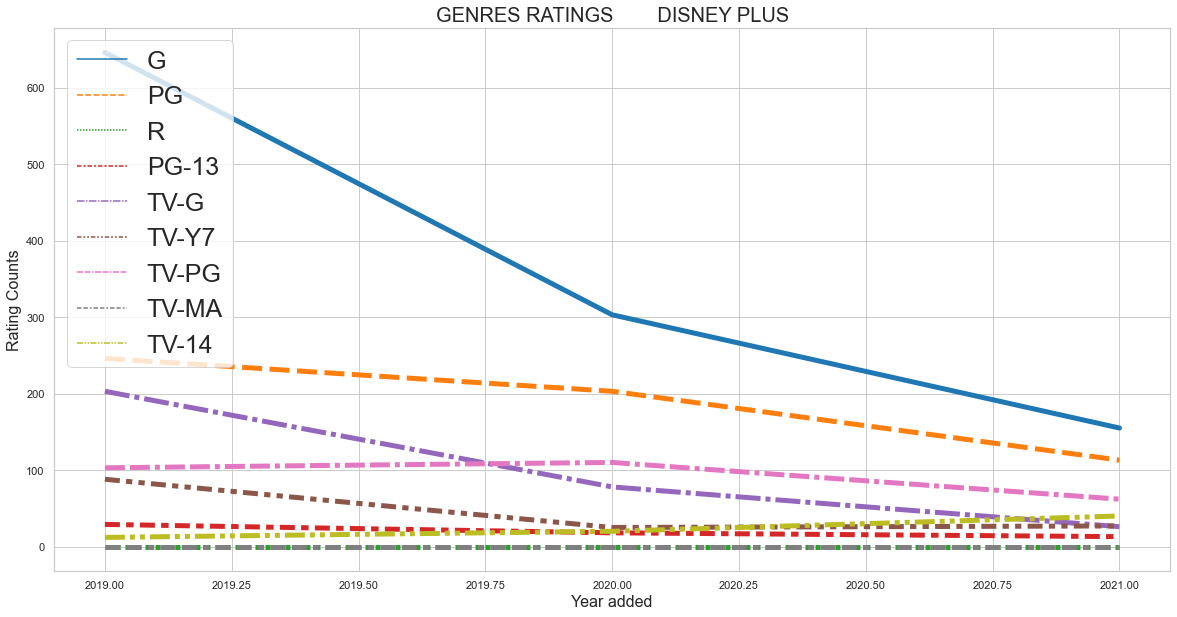

In [51]:
rating_plot(dis_rat_1,'DISNEY PLUS','added')

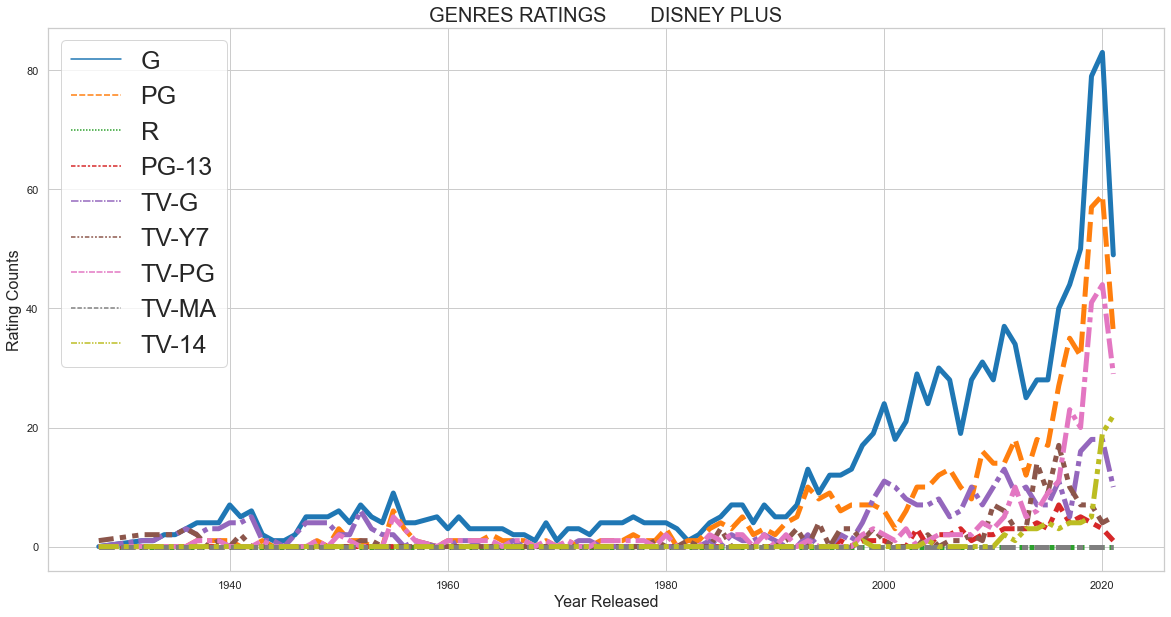

In [52]:
rating_plot(dis_rat_2,'DISNEY PLUS','Released')

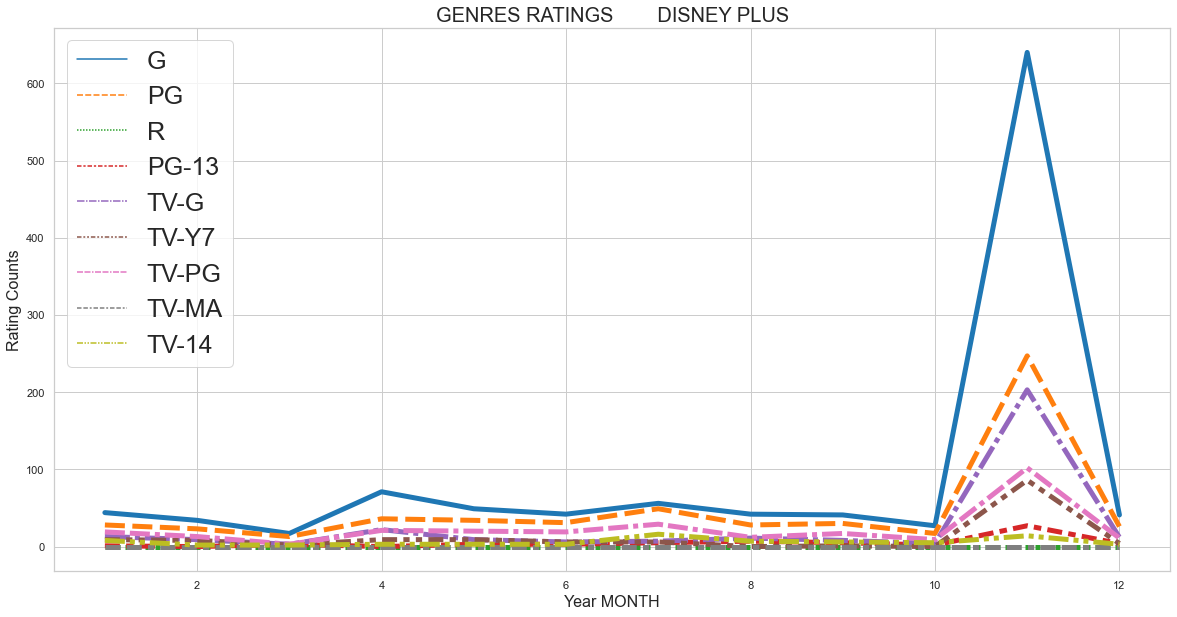

In [53]:
rating_plot(dis_rat_3,'DISNEY PLUS','MONTH')

In [54]:
# DISNEY PLUS
# Can't sy the smae for disney though as from the above plot it is clear that
# disney loves to release it's shows and movies on the month of 'November'

In [55]:
# DISNEY PLUS
# It is also clear that disney's main focus is mostly kids 
# As it produces more contents for General audience and PG rating shows and movies

In [56]:
# FOR AMAZON PRIME ONLY 
def rating_year_ama(data):
    df = data[['type','director','country','release_year','rating','duration','listed_in']]
    raters = ['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14']

    for ret in raters:
        ret_list = []
        for i in df['rating']:
            ret_val = 1 if ret in str(i) else 0
            ret_list.append(ret_val)
        df[ret] =  ret_list
    return df    

In [57]:
ama_rat = rating_year_ama(amazon)
ama_rat_1 = ama_rat.groupby('release_year')['G','PG','R','PG-13','TV-G','TV-Y7','TV-PG','TV-MA','TV-14'].sum()

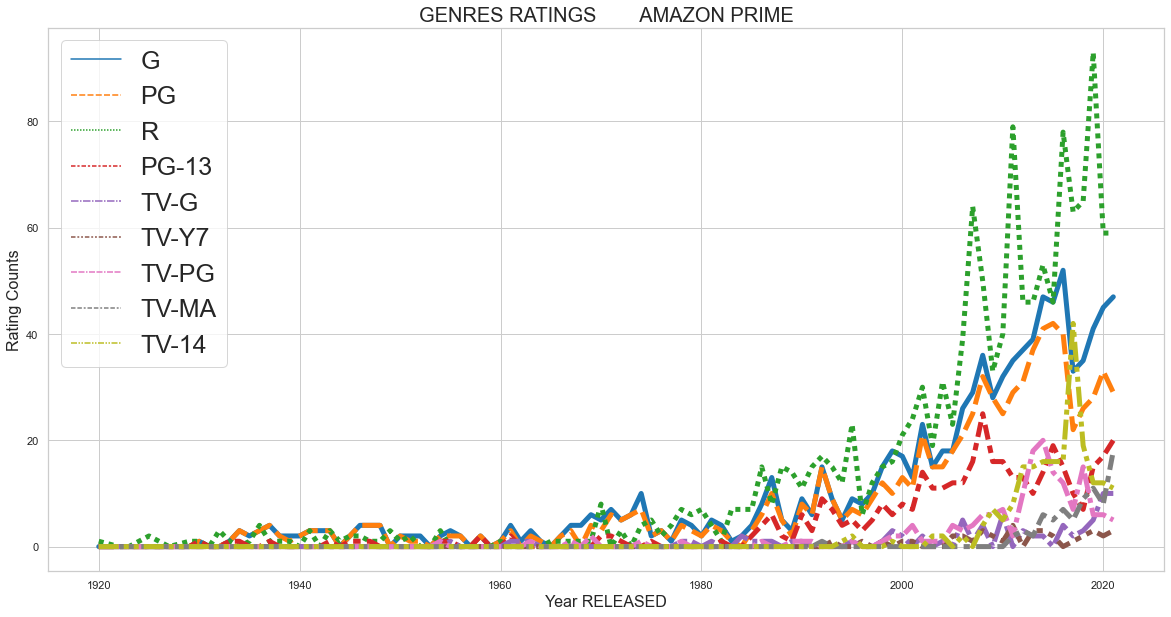

In [58]:
rating_plot(ama_rat_1,'AMAZON PRIME','RELEASED')

In [59]:
# AMAZON PRIME
# Well amazon also produce more mature R rated contents
# then comes the G rated for general audiences and PG ratings

In [60]:
# what genre is most famous for what ratings
n_flix_gr_1 = n_flix_gen.groupby('rating')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()
dis_gr_1 = dis_gen.groupby('rating')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()
ama_gr_1 = ama_gen.groupby('rating')['action','sci-fi','documentaries','docuseries','horror','fantasy','anim','drama','comed','reality','thriller','roman','music','lgbtq','sports'].sum()

In [61]:
def gen_rating_plot(data,platform):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (20,10))
    sns.lineplot(data=data, palette="tab10", linewidth= 5)
    plt.title('GENRES Vs RATINGS'+'        '+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('Ratings',fontsize = 16)
    plt.ylabel('Movies and Shows Count',fontsize = 16)
    plt.legend(loc="upper right", frameon=True, fontsize=18,markerscale = 80)
    plt.show()

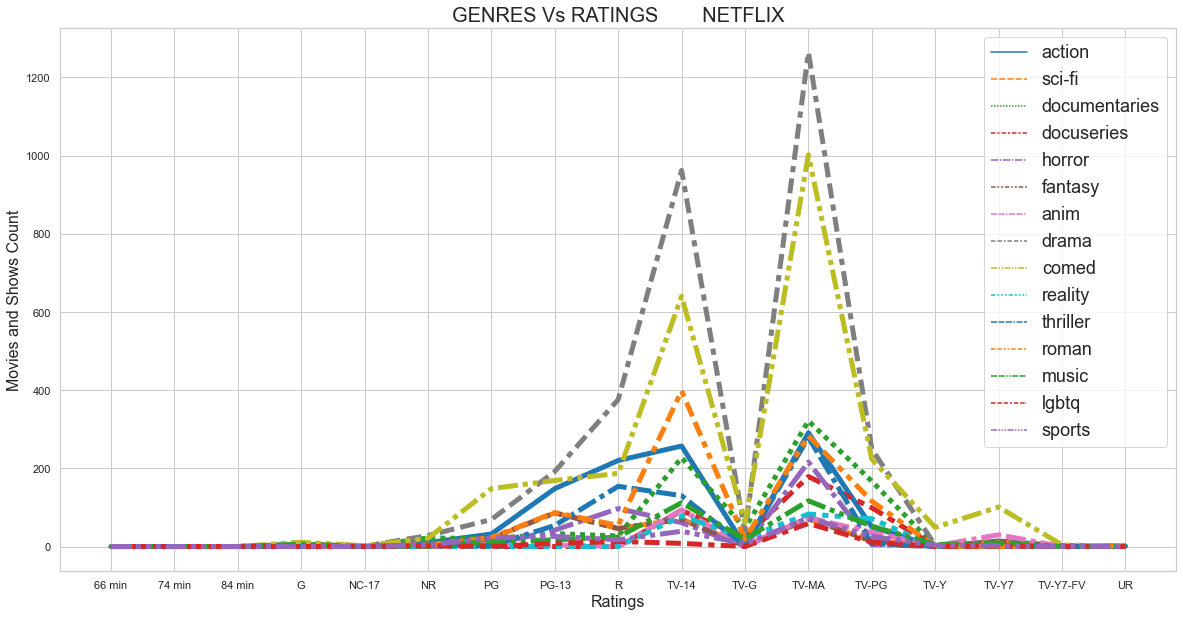

In [62]:
gen_rating_plot(n_flix_gr_1,'NETFLIX')

In [63]:
# NETFLIX
# May be it's not that new but well netflix is making more drama and comedy
# related shows for mature audiences though there are comedy shows for PG & TV-Y7 too

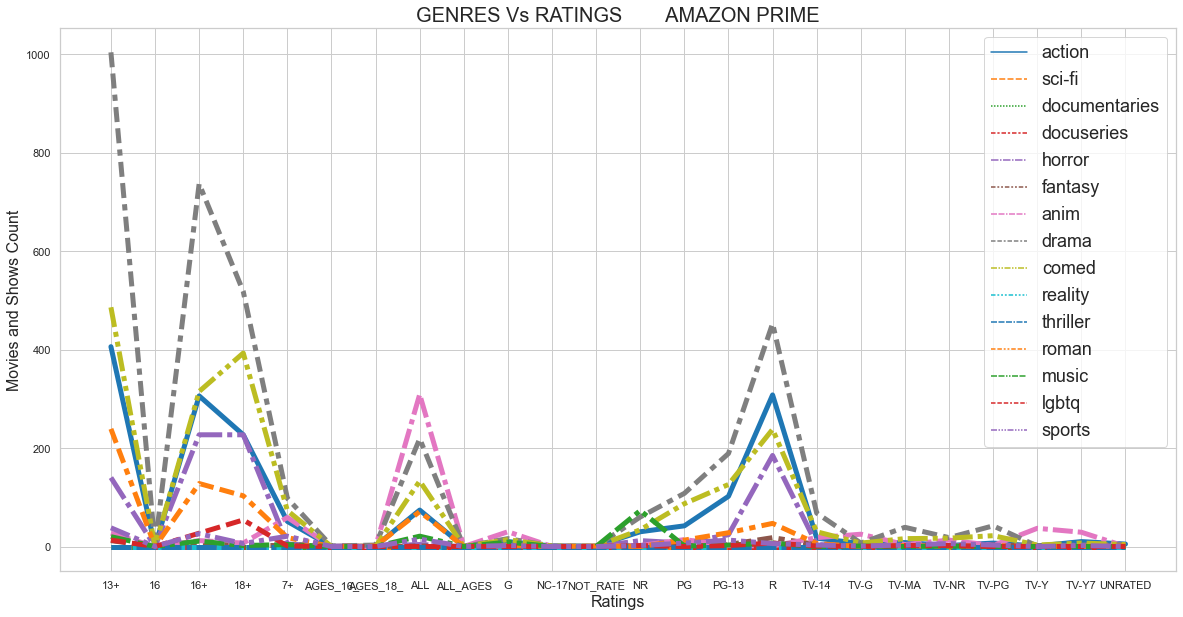

In [64]:
gen_rating_plot(ama_gr_1,'AMAZON PRIME')

In [65]:
# AMAZON PRIME
# Intresting spred
# Ok so amazon produces more 16+, R rated and 18+ dramas, comedies, romance and actions shows and movies
# For G rating or for all ages it produces more animated series and movies

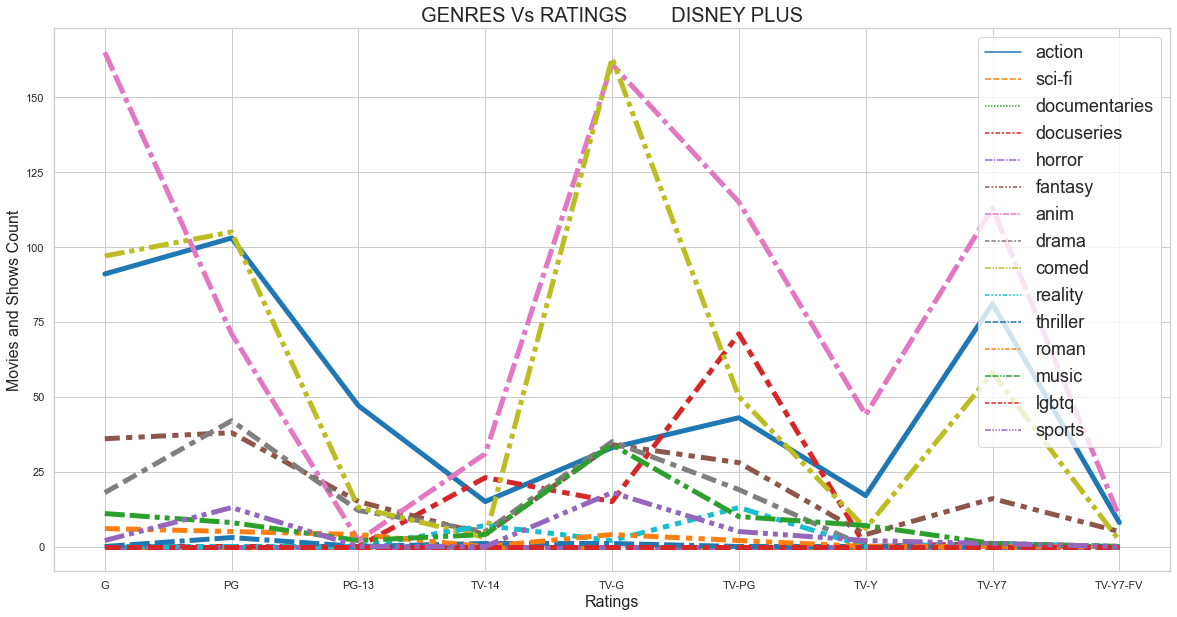

In [66]:
gen_rating_plot(dis_gr_1,'DISNEY PLUS')

In [67]:
# DISNEY PLUS
# Most of the G, TV-G, TV-PG, TV-Y and TV-Y7 are for young children and 
# those are  mostly animations and comedy shows and movies
# PG-13 have more action movies
# docuseries and Musicals are mostly TV-G 

In [68]:
# country with year_added or released_year
# country with type
# country with rating
# country with duration
# year_added Vs duration

In [69]:
# country with year_added or released_year
def Country_(data):
    df = data[['type','director','country','release_year','rating','duration','listed_in']]
    countries = ['United States', 'South Africa', 'India','United Kingdom', 'Germany', 'Ethiopia','Mexico', 'Turkey','Australia','France','Italy','Japan','Canada','China','South Korea','Brazil','New Zealand','Spain','Mexico']    
    for coun in countries:
        coun_list = []
        for i in df['country']:
            coun_val = 1 if coun in str(i) else 0
            coun_list.append(coun_val)
        df[coun] =  coun_list
    return df    

In [70]:
net_count = Country_(netflix)
dis_count = Country_(disney)
ama_count = Country_(amazon)
ama_count_1 = ama_count.groupby('release_year')['United States', 'South Africa', 'India','United Kingdom', 'Germany', 'Ethiopia','Mexico', 'Turkey','Australia','France','Italy','Japan','Canada','China','South Korea','Brazil','New Zealand','Spain','Mexico'].sum()
dis_count_1 = dis_count.groupby('release_year')['United States', 'South Africa', 'India','United Kingdom', 'Germany', 'Ethiopia','Mexico', 'Turkey','Australia','France','Italy','Japan','Canada','China','South Korea','Brazil','New Zealand','Spain','Mexico'].sum()
net_count_1 = net_count.groupby('release_year')['United States', 'South Africa', 'India','United Kingdom', 'Germany', 'Ethiopia','Mexico', 'Turkey','Australia','France','Italy','Japan','Canada','China','South Korea','Brazil','New Zealand','Spain','Mexico'].sum()

In [71]:
def Country_plot(data,platform):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (20,10))
    sns.lineplot(data=data, palette="tab10", linewidth= 5)
    plt.title('Movies and Shows of different countries over the years'+'        '+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('Years',fontsize = 16)
    plt.ylabel('Movies and Shows Count',fontsize = 16)
    plt.legend(loc="upper left", frameon=True, fontsize=18,markerscale = 80)
    plt.show()

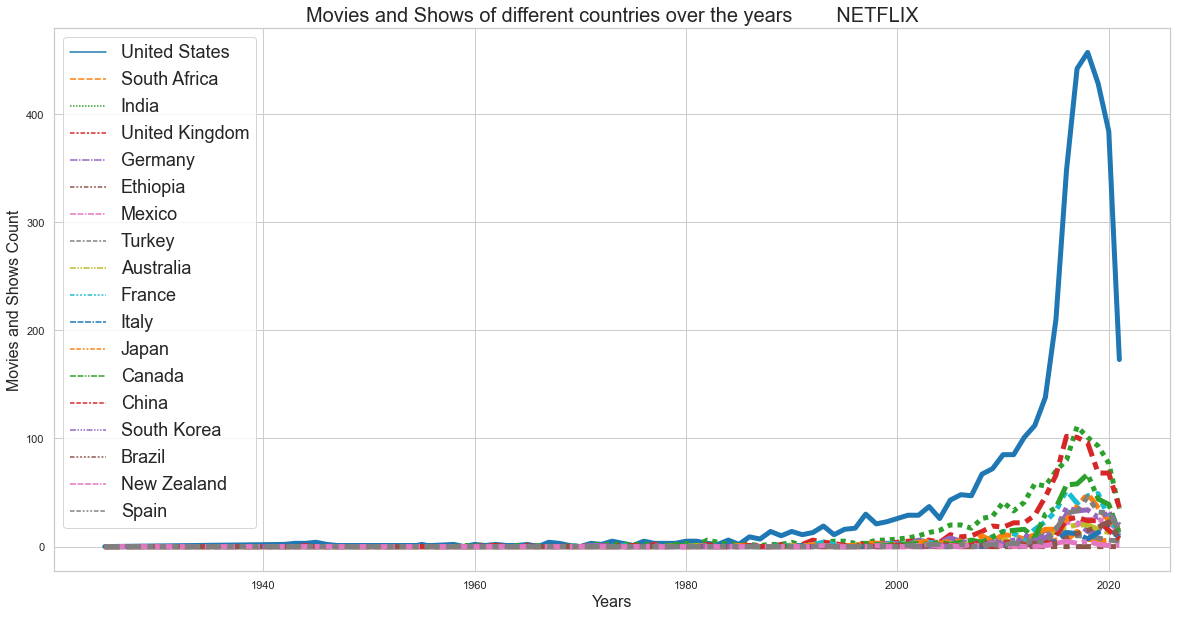

In [72]:
Country_plot(net_count_1,'NETFLIX')

In [73]:
# It's very very obvious from the plot that for the last 5-6 years or so the 
# amount of contents produced for US have increased a lot 
# the second place holder is India
# and the 3rd and still increasing (neglecting the last two years of pandemic)
# is UK

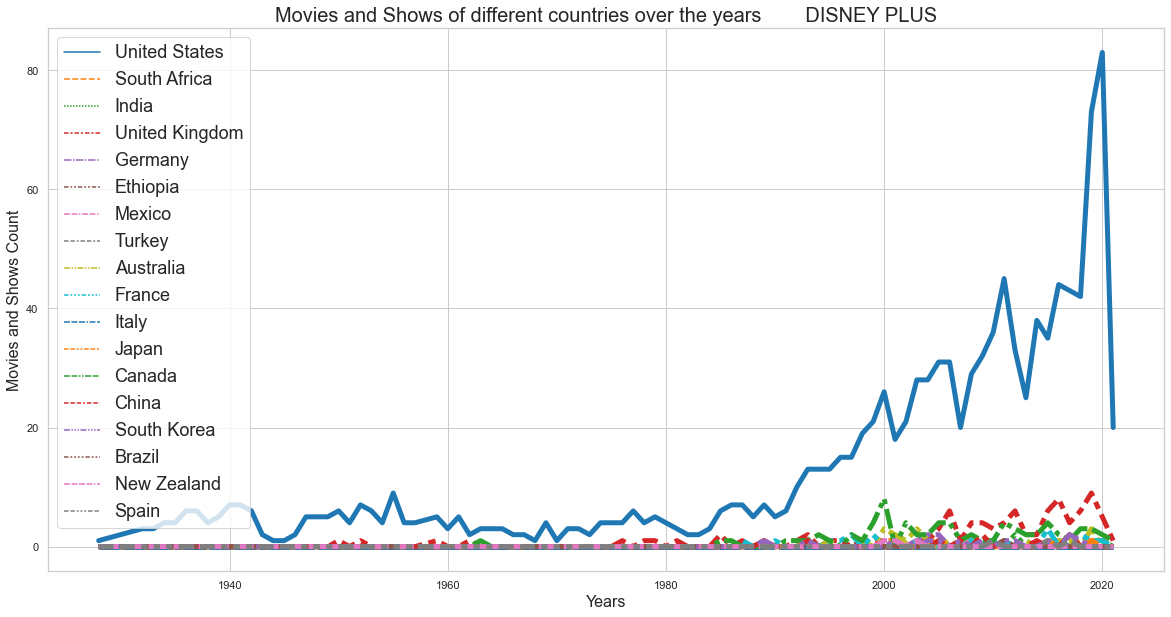

In [74]:
Country_plot(dis_count_1,'DISNEY PLUS')

In [75]:
#DISNEY PLUS
# Most of the contents made by disney is for US by far no competater
# Then comes UK

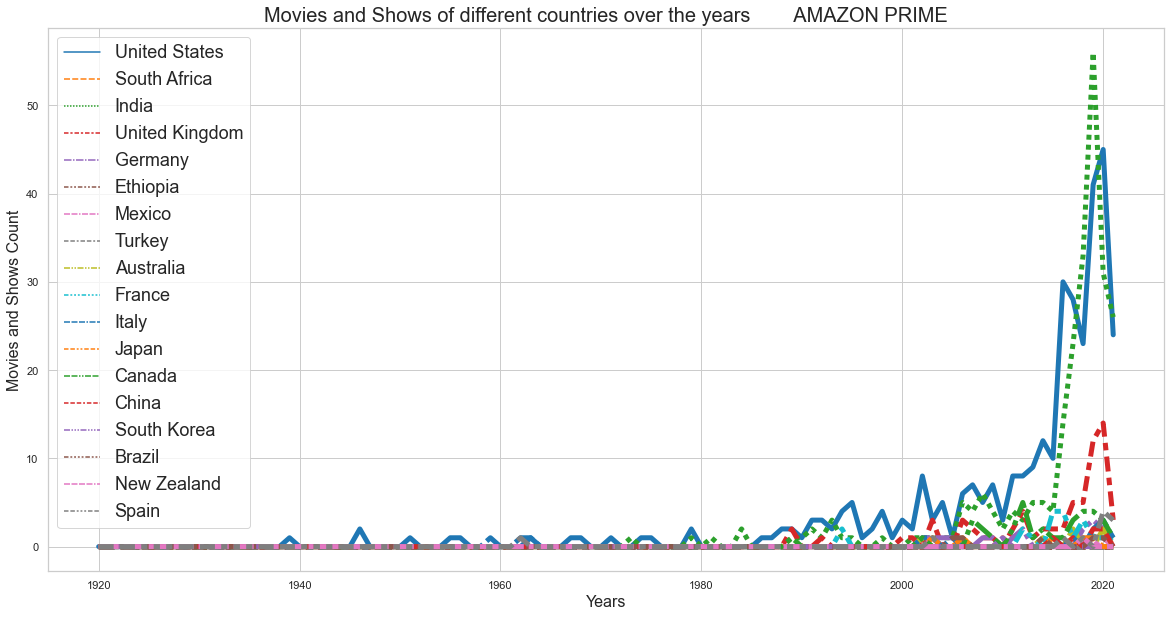

In [76]:
Country_plot(ama_count_1,'AMAZON PRIME')

In [77]:
# AMAZON PRIME
# For last 3-4 years amazon is realy trying to capture the Indian market
# which very much evident from the above plot
# Just bellow is US
# and then comes UK

In [78]:
# country with rating
net_count_2 = net_count.groupby('rating')['United States', 'South Africa', 'India','United Kingdom', 'Germany', 'Ethiopia','Mexico', 'Turkey','Australia','France','Italy','Japan','Canada','China','South Korea','Brazil','New Zealand','Spain','Mexico'].sum()
ama_count_2 = ama_count.groupby('rating')['United States', 'South Africa', 'India','United Kingdom', 'Germany', 'Ethiopia','Mexico', 'Turkey','Australia','France','Italy','Japan','Canada','China','South Korea','Brazil','New Zealand','Spain','Mexico'].sum()
dis_count_2 = dis_count.groupby('rating')['United States', 'South Africa', 'India','United Kingdom', 'Germany', 'Ethiopia','Mexico', 'Turkey','Australia','France','Italy','Japan','Canada','China','South Korea','Brazil','New Zealand','Spain','Mexico'].sum()

In [79]:
def Country_rating_plot(data,platform):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (20,10))
    sns.lineplot(data=data, palette="tab10", linewidth= 5)
    plt.title('Movies and Shows of different countries and there ratings'+'        '+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('Ratings',fontsize = 16)
    plt.ylabel('Movies and Shows Count',fontsize = 16)
    plt.legend(loc="upper right", frameon=True, fontsize=18,markerscale = 80)
    plt.show()

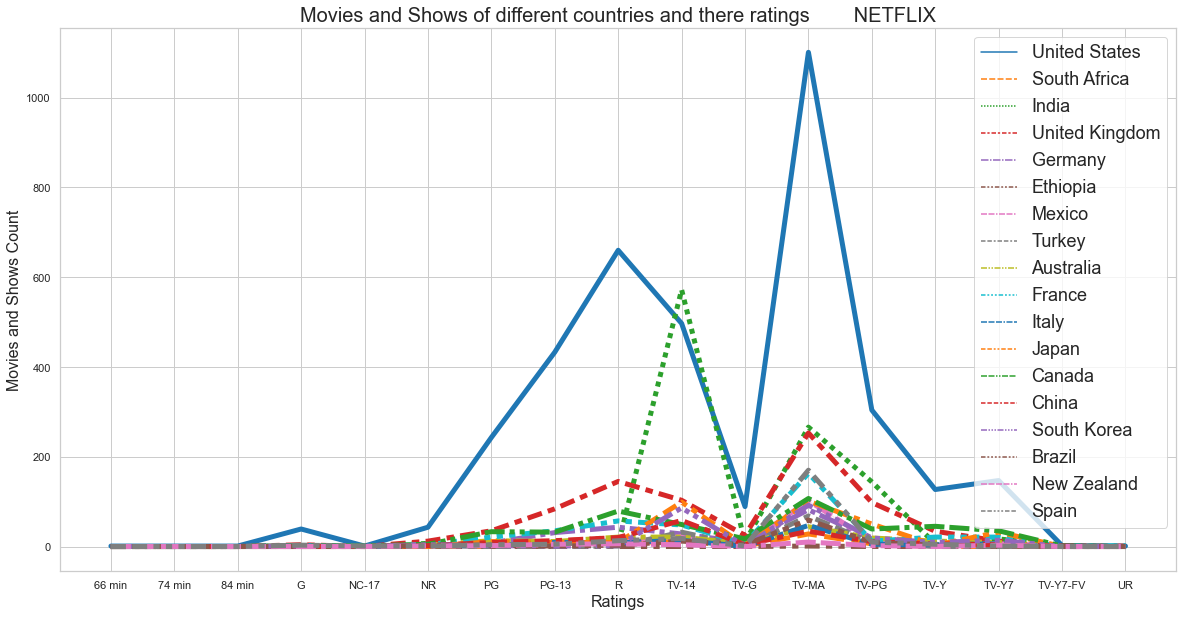

In [80]:
Country_rating_plot(net_count_2,'NETFLIX')

In [81]:
# NETFLIX
# well most of the US based contents are either R rated or TV-MA in shorts
# for mature audiences
# while some indian shows are also TV-MA rated along with 
# major are TV-14 rated

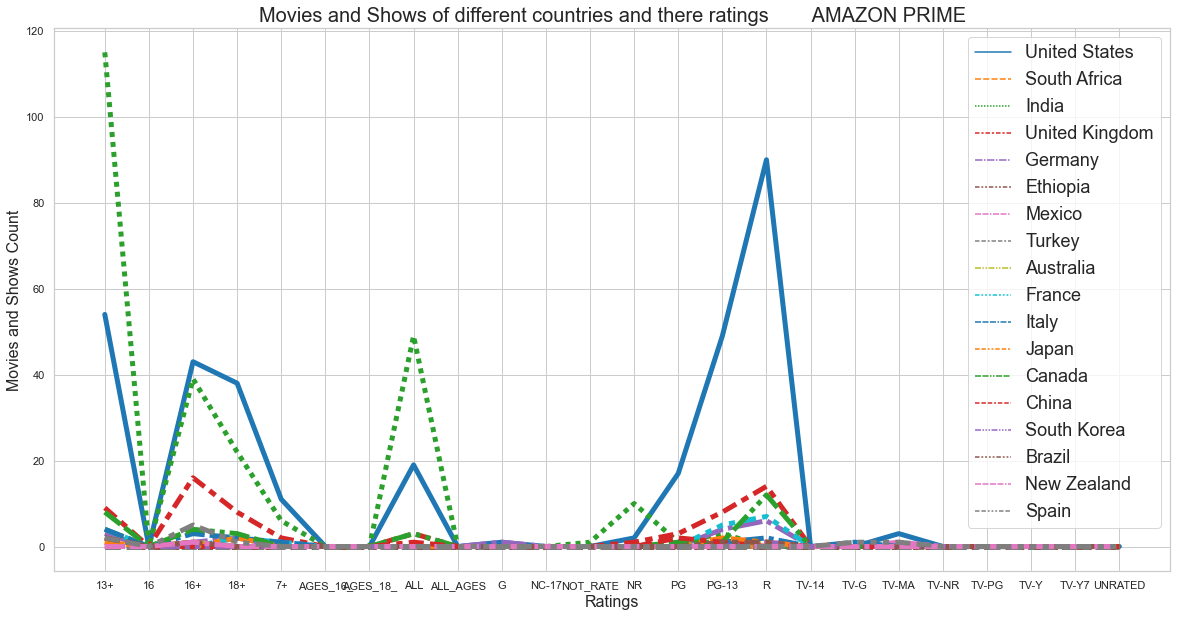

In [86]:
Country_rating_plot(ama_count_2,'AMAZON PRIME')

In [83]:
# AMAZON PRIME
# Again most of the US shows are R rated or 16+,18+ rated 
# while most Indian shows are 13+, 16+ and for ALL audiences
# and some are R rated

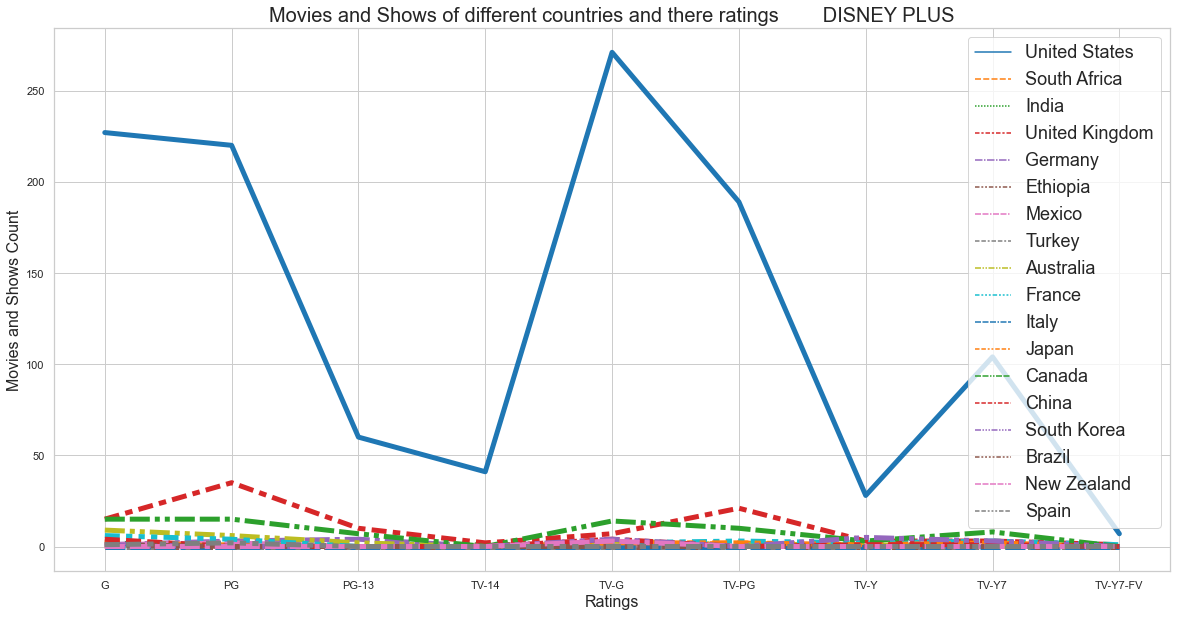

In [84]:
Country_rating_plot(dis_count_2,'DISNEY PLUS')

In [85]:
# DISNEY PLUS
# well there is nothing to say as most of the movies and shows are 
# made for US and as it's disney so most of the shows are targeted towards
# younder audiences and general audiences

In [149]:
def duration_col_added(df_name):
    df_name['duration_min'] = [int(str(i).split(" ")[0]) if str(i).split(" ")[-1] == 'min' else 0 for i in df_name.duration]
    return df_name

In [150]:
netflix = duration_col_added(netflix)
amazon = duration_col_added(amazon)
disney = duration_col_added(disney)

In [166]:
def movie_duration(platform_df):
    df_1 = platform_df[platform_df.type == 'Movie']
    net_movie_duration = pd.DataFrame(df_1.groupby(['release_year'])['duration_min'].mean())
    return net_movie_duration

In [171]:
net_movie_duration = movie_duration(netflix)
ama_movie_duration = movie_duration(amazon)
dis_movie_duration = movie_duration(disney)

In [174]:
def duration_year_plot(data,platform):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (20,10))
    sns.lineplot(data=data, palette="tab10", linewidth= 5)
    plt.title('MOVIES DURATION CHAGES OVER THE YEARS'+'        '+platform,fontsize = 20, fontweight = 16)
    plt.xlabel('Years',fontsize = 16)
    plt.ylabel('AVG. DURATION (Avg. Length of Movies)',fontsize = 16)
    plt.legend(loc="upper right", frameon=True, fontsize=18,markerscale = 80)
    plt.show()

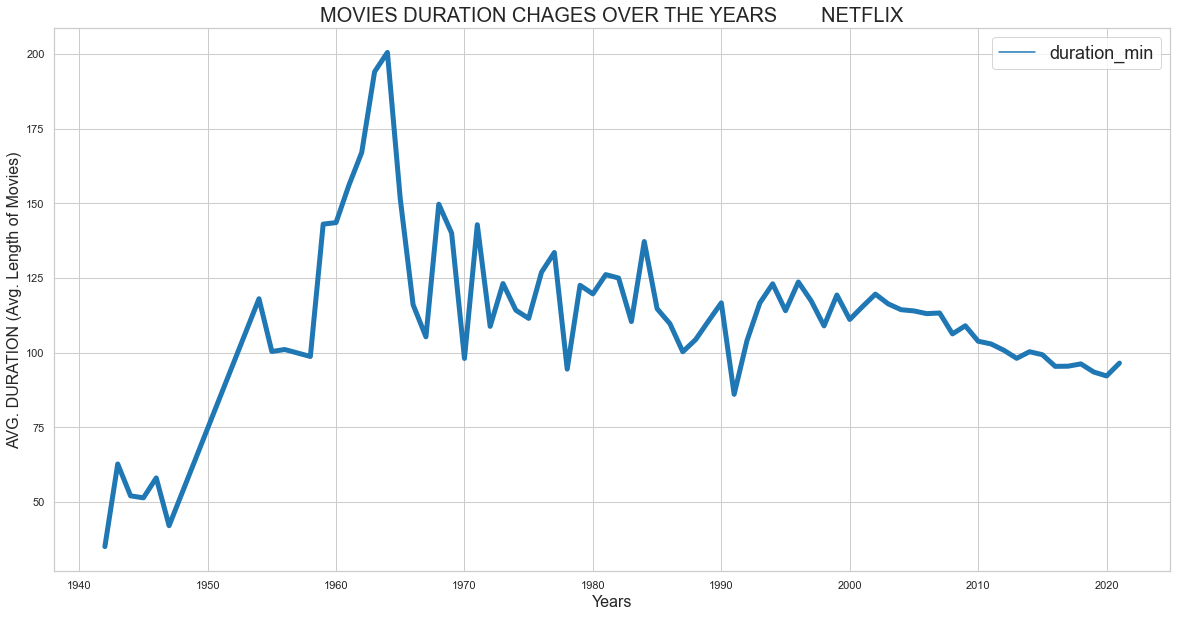

In [175]:
duration_year_plot(net_movie_duration,'NETFLIX')

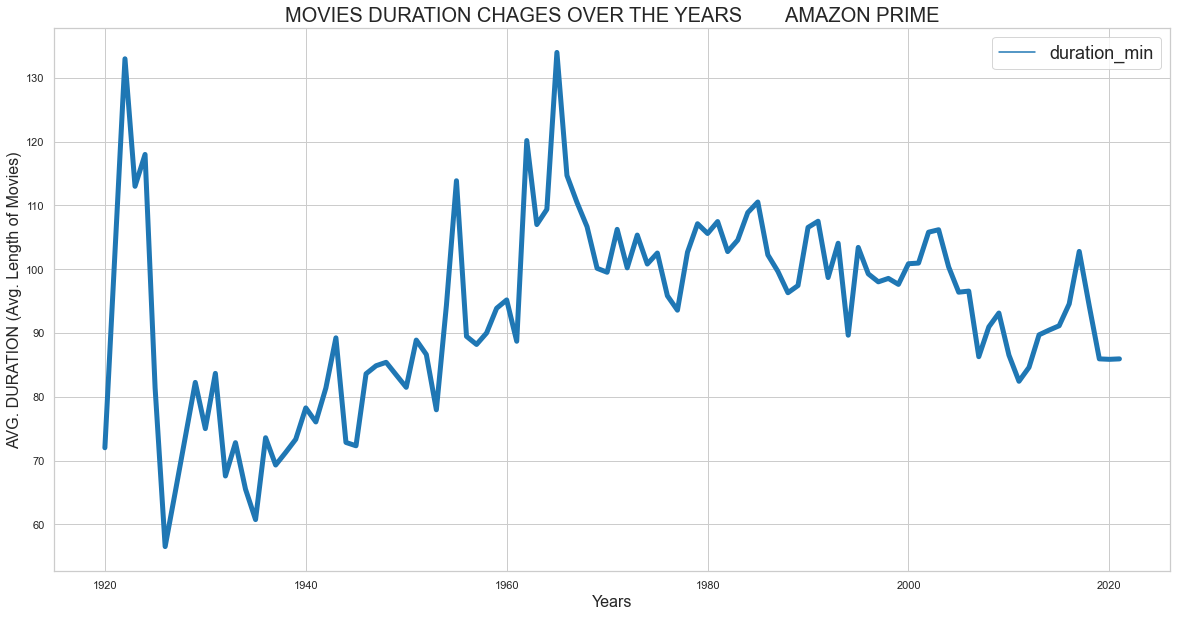

In [176]:
duration_year_plot(ama_movie_duration,'AMAZON PRIME')

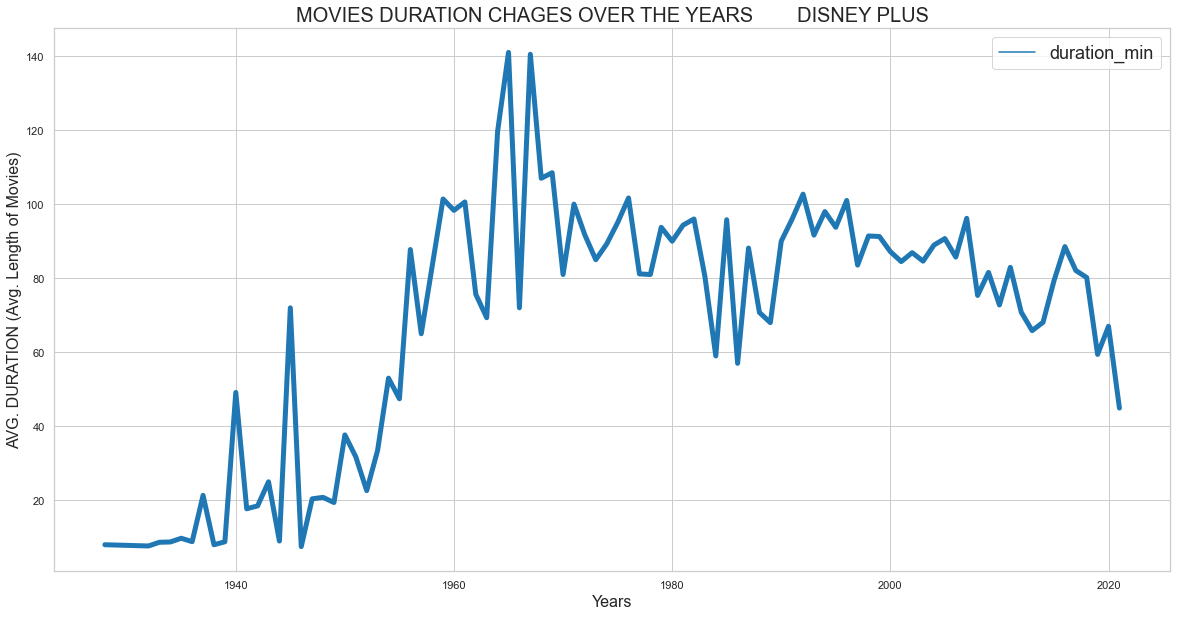

In [177]:
duration_year_plot(dis_movie_duration,'DISNEY PLUS')

In [93]:
def country_data(name_of_the_counrty,platform_data):
    """ takes the name of th ecountry and the platform dataset as input argguments
        returns a dataframe made for a specific country with the columns -->
       'title',
       'rating',
       'cast',
       'listed_in',
       'type',
       'release_year' 
       'date_added' 
    """
    
    pla_co = platform_data[platform_data['country'] == name_of_the_counrty][['title',
                                           'rating',
                                           'director',
                                           'cast',
                                           'listed_in',
                                           'type',
                                           'release_year',
                                           'date_added'             
                                          ]]
    return pla_co    

In [96]:
net_india = country_data('India',netflix)
ama_india = country_data('India',amazon)
dis_india = country_data('India',disney)

In [97]:
print('The amount of content made by {} for India is : {}'.format('Netflix',net_india.shape[0]))
print('The amount of content made by {} for India is : {}'.format('Amazon Prime',ama_india.shape[0]))
print('The amount of content made by {} for India is : {}'.format('Disney Plus',dis_india.shape[0]))


The amount of content made by Netflix for India is : 972
The amount of content made by Amazon Prime for India is : 229
The amount of content made by Disney Plus for India is : 2


In [178]:
def scatter_rating_vs_year(name_of_the_country,platform_data_list,platform_name):
    for plat_data,platform_name in zip(platform_data_list,platform_name):
        d1 = country_data(name_of_the_country,plat_data)
        plt.figure(figsize = (15,6))
        sns.scatterplot(x = d1['release_year'],y = d1['rating'], hue = d1['type'])
        plt.title('Release Year and there ratings in '+ platform_name,fontsize = 20, fontweight = 16)
        plt.show()

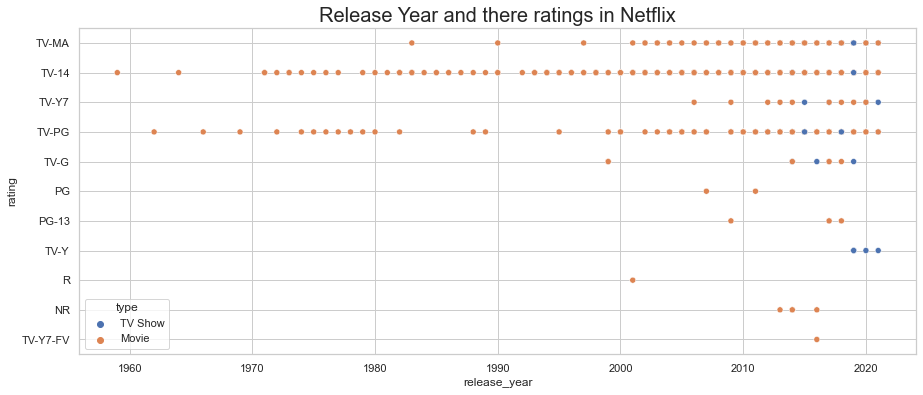

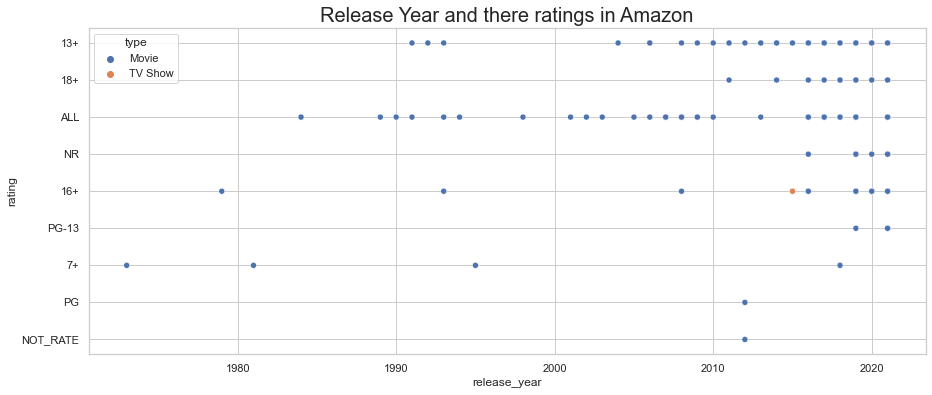

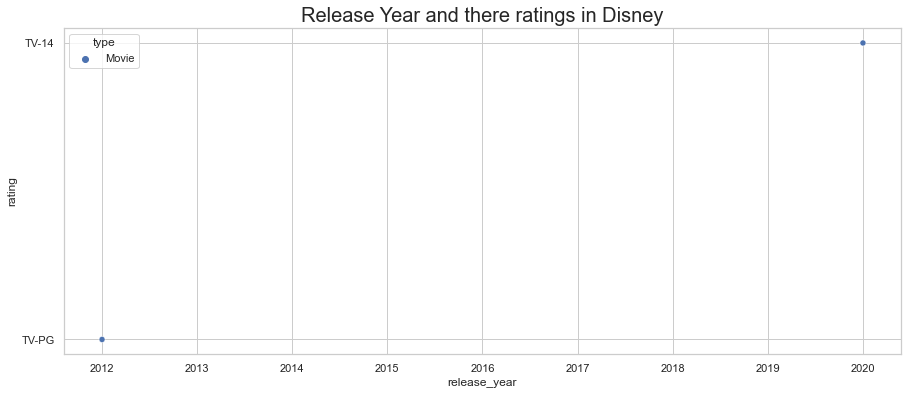

In [179]:
scatter_rating_vs_year('India',[netflix,amazon,disney],['Netflix','Amazon','Disney'])

In [180]:
# India 
# form the above plots we can see that all the streaming platforms , lets
# don't cosider disney as there isn't enough contents, are making more
# movies for india that tv shows
# but it also seems like netflix is increasing the no. of tv shows 
# we can also notice that netflix shows for india is mostly for 14+ or PG
# but TV-MA is also increasing
# while for amazon prime most contents foe all the age groups or 13+

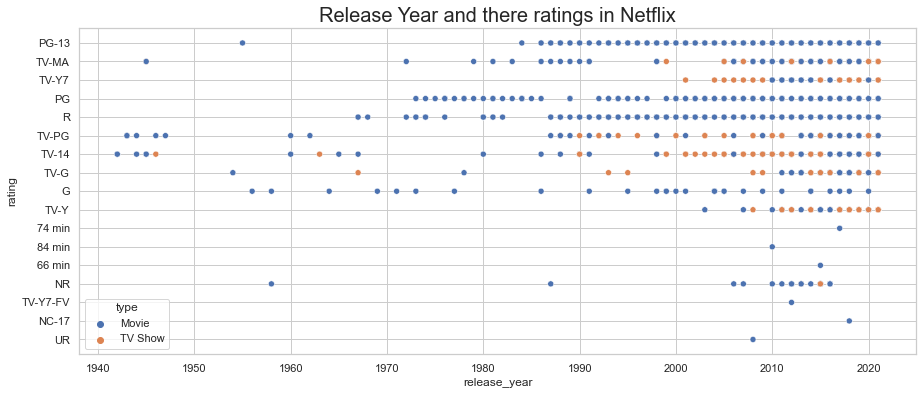

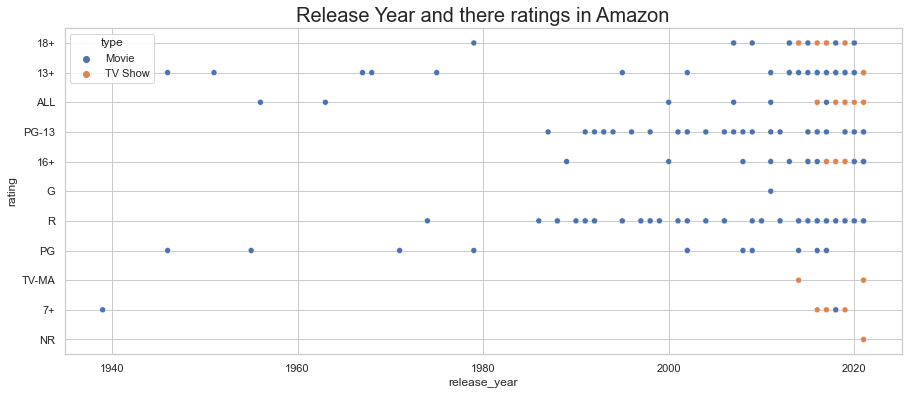

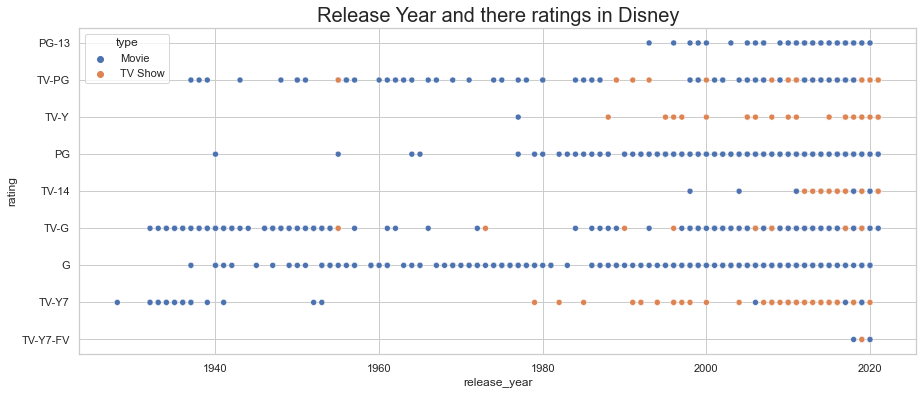

In [181]:
scatter_rating_vs_year('United States',[netflix,amazon,disney],['Netflix','Amazon','Disney'])

In [182]:
# US
# 

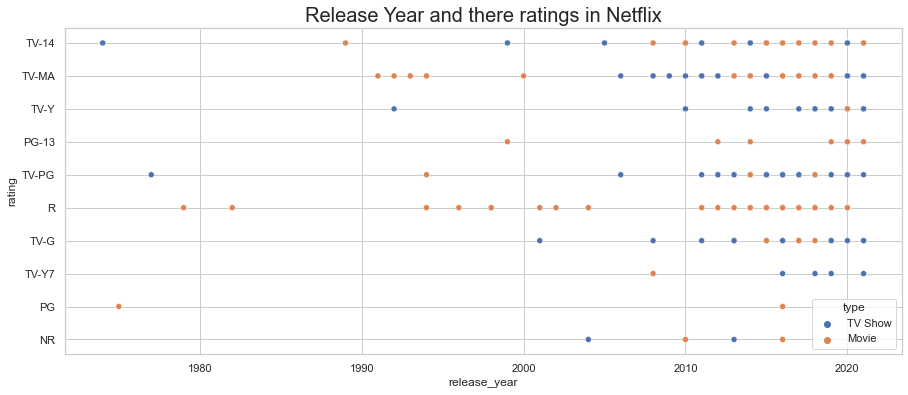

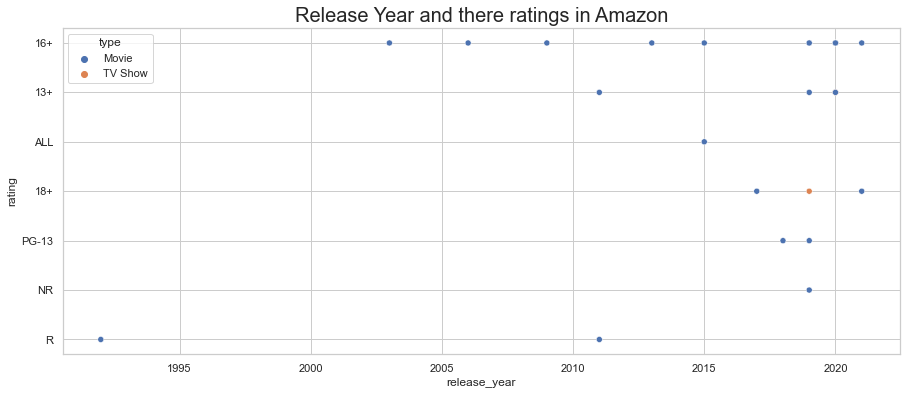

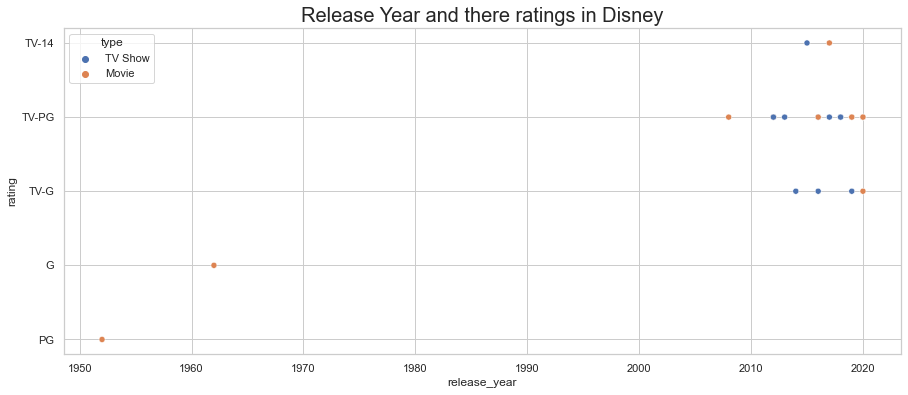

In [183]:
scatter_rating_vs_year('United Kingdom',[netflix,amazon,disney],['Netflix','Amazon','Disney'])

In [ ]:
# Each data file (there are 4 of them) contains below columns:

# Movie ID (as first line of each new movie record / file)
# Customer ID
# Rating (1 to 5)
# Date they gave the ratings
# There is another file contains the mapping of Movie ID to the movie background like name, year of release, etc

In [2]:
#****************************************************************************
#****************************************************************************
#****************************************************************************

# df1 = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\netflix recomendation\combined_data_1.txt')
# df2 = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\netflix recomendation\combined_data_2.txt')
# df3 = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\netflix recomendation\combined_data_3.txt')
# df4 = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\netflix recomendation\combined_data_4.txt')
# # df.index = np.arange(0,len(df))
# df = df1.append(df2)
# df = df.append(df3)
# df = df.append(df4)